<a href="https://colab.research.google.com/github/chriswebb31/FastAI/blob/master/Lesson2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3'
from fastai import *
from fastai.vision import *
import matplotlib.pyplot as plt

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from fastai.basics import *

In [0]:
n = 100

In [47]:
x = torch.ones(n, 2)
x[:, 0].uniform_(-1.,1)
x[:5]

tensor([[ 0.9215,  1.0000],
        [-0.9727,  1.0000],
        [-0.7967,  1.0000],
        [ 0.8133,  1.0000],
        [ 0.4048,  1.0000]])

In [48]:
a = tensor([3., 2.]); a

tensor([3., 2.])

In [0]:
y = x@a + torch.rand(n)

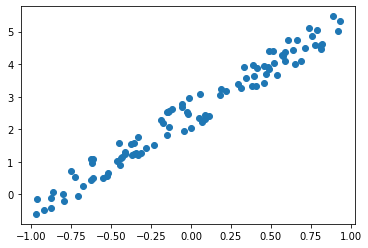

In [50]:
plt.scatter(x[:, 0], y)

In [0]:
def mse(y_hat, y):
  return ((y_hat - y) ** 2).mean()

In [0]:
a = tensor(-1., 1)

In [53]:
y_hat = x@a
mse(y_hat, y)

tensor(6.9961)

In [54]:
y_hat

tensor([0.0785, 1.9727, 1.7967, 0.1867, 0.5952, 1.1749, 1.4659, 1.1525, 1.7499,
        0.6889, 1.8640, 1.5522, 0.0650, 1.3416, 0.5091, 0.3609, 0.8158, 1.7100,
        1.2323, 1.3140, 1.0244, 0.9420, 1.0594, 1.4525, 0.9987, 0.5267, 1.2844,
        1.5193, 0.4252, 1.6234, 0.7784, 0.9097, 0.3077, 1.6127, 1.4393, 0.2620,
        1.9642, 0.1774, 0.2250, 0.6132, 1.1495, 0.4293, 1.4135, 0.4119, 0.6197,
        1.1185, 1.0458, 1.1422, 1.1854, 1.3310, 1.8762, 0.1122, 1.8805, 0.8865,
        0.6020, 1.3588, 1.9185, 0.3505, 1.6269, 1.8028, 0.9504, 0.5440, 1.0106,
        1.6771, 0.2102, 0.5838, 0.1837, 1.1408, 1.4336, 0.9095, 0.5426, 1.6256,
        1.3307, 0.2416, 1.5276, 1.3576, 1.6134, 0.4867, 0.6546, 1.4111, 0.3921,
        0.4784, 1.3737, 1.3718, 0.5189, 1.7240, 0.1920, 1.4467, 0.8097, 0.4602,
        1.0593, 1.0192, 0.3332, 1.1350, 0.9315, 0.6683, 0.4084, 0.7082, 0.5081,
        0.2831])

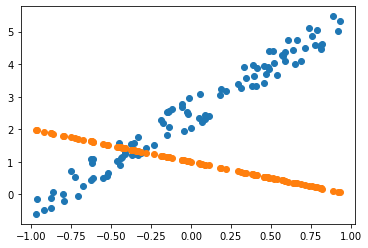

In [55]:
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], y_hat)

In [56]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [58]:
lr = 1e-1
for t in range(100): 
  update()

tensor(6.9961, grad_fn=<MeanBackward0>)
tensor(1.4712, grad_fn=<MeanBackward0>)
tensor(0.5016, grad_fn=<MeanBackward0>)
tensor(0.2134, grad_fn=<MeanBackward0>)
tensor(0.1254, grad_fn=<MeanBackward0>)
tensor(0.0984, grad_fn=<MeanBackward0>)
tensor(0.0902, grad_fn=<MeanBackward0>)
tensor(0.0877, grad_fn=<MeanBackward0>)
tensor(0.0869, grad_fn=<MeanBackward0>)
tensor(0.0867, grad_fn=<MeanBackward0>)


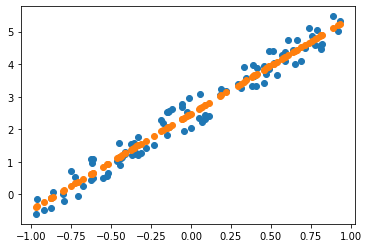

In [59]:
plt.scatter(x[:,0],y)
with torch.no_grad():
    plt.scatter(x[:,0],x@a);

In [0]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [0]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
with torch.no_grad():
    line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    with torch.no_grad():
        line.set_ydata(x@a)
    return line,

In [64]:
animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)